In [9]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn

from core.detector_factory import DetectorFactory

In [10]:
is_spectrum_model = True
training_epochs = 20

factory = DetectorFactory(is_spectrum_model=is_spectrum_model)

In [11]:
mediator = factory.create_mediator()

data_loaders = mediator.load_dataset(100)
train_loader, val_loader, test_loader = data_loaders

print('Finished Data Preparation')

Finished Data Preparation


In [12]:
model = factory.create_model()
model.init_weights()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

print('Model initialized')

Model initialized


In [13]:
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(training_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(
        f"Epoch {epoch + 1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

Epoch 1, Training Loss: 4.4020, Validation Loss: 0.7435, Accuracy: 46.67%
Epoch 2, Training Loss: 1.2663, Validation Loss: 0.7430, Accuracy: 53.33%
Epoch 3, Training Loss: 1.7781, Validation Loss: 1.2552, Accuracy: 53.33%
Epoch 4, Training Loss: 0.3948, Validation Loss: 1.4760, Accuracy: 53.33%
Epoch 5, Training Loss: 0.1570, Validation Loss: 1.2688, Accuracy: 60.00%
Epoch 6, Training Loss: 0.2754, Validation Loss: 0.9933, Accuracy: 53.33%
Epoch 7, Training Loss: 0.2298, Validation Loss: 1.2084, Accuracy: 60.00%
Epoch 8, Training Loss: 0.1297, Validation Loss: 1.8388, Accuracy: 60.00%
Epoch 9, Training Loss: 0.1606, Validation Loss: 1.7083, Accuracy: 60.00%
Epoch 10, Training Loss: 0.1287, Validation Loss: 1.2339, Accuracy: 73.33%
Epoch 11, Training Loss: 0.0809, Validation Loss: 1.3164, Accuracy: 73.33%
Epoch 12, Training Loss: 0.0871, Validation Loss: 1.6078, Accuracy: 73.33%
Epoch 13, Training Loss: 0.1432, Validation Loss: 2.0415, Accuracy: 66.67%
Epoch 14, Training Loss: 0.2441, V

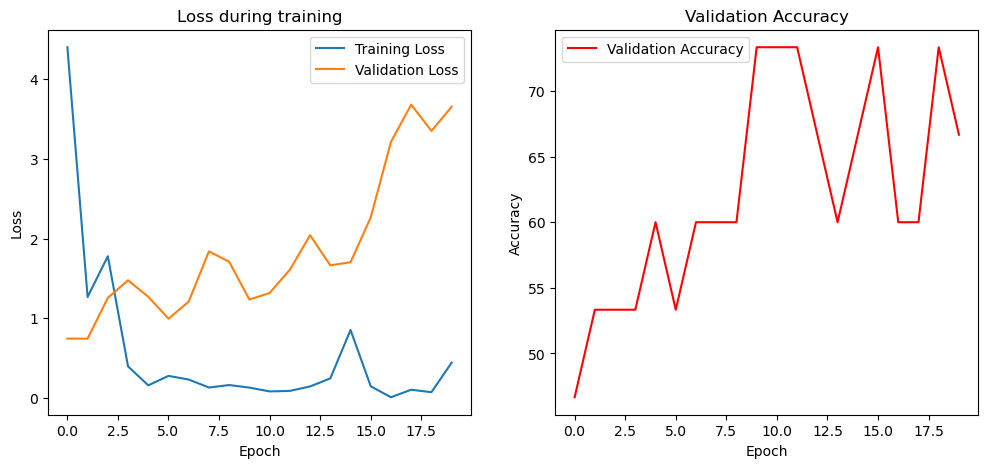

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on test files: {100 * correct // total} %')

Accuracy of the network on test files: 86 %


In [16]:
model.save_model()
print('Model saved')

Model saved
